In [28]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [2]:
a = pd.read_csv("/content/training.csv",dayfirst=True)
a["Date"] = pd.to_datetime(a["Date"])
a=a.set_index('Date')

test = adfuller(a["Value"])
if test[0]>test[4]["5%"]:
  print("есть единичные корни, ряд не стационарен")
else:
  print("нет единичных корней, ряд стационарен")

есть единичные корни, ряд не стационарен


***MULTIPLICATIVE:***

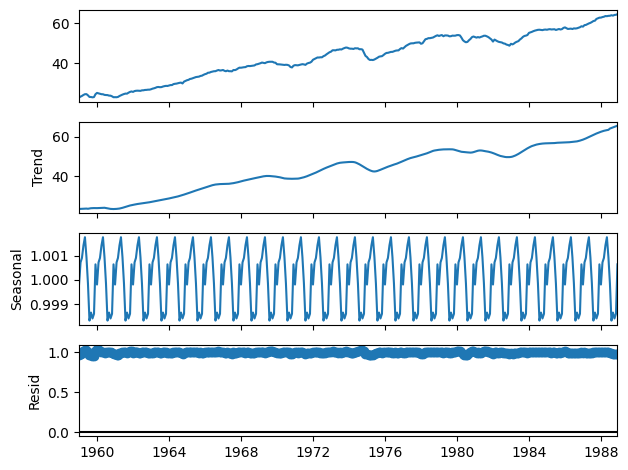

In [3]:
decompose = seasonal_decompose(a,model='multiplicative', extrapolate_trend='freq')
decompose.plot()
plt.show()


In [4]:
print("1-trend; 2-seasonal; 3-resid:")
test = adfuller(decompose.trend)
if test[0]>test[4]["5%"]:
  print("есть единичные корни, ряд не стационарен")
else:
  print("нет единичных корней, ряд стационарен")

test = adfuller(decompose.seasonal)
if test[0]>test[4]["5%"]:
  print("есть единичные корни, ряд не стационарен")
else:
  print("нет единичных корней, ряд стационарен")

test = adfuller(decompose.resid)
if test[0]>test[4]["5%"]:
  print("есть единичные корни, ряд не стационарен")
else:
  print("нет единичных корней, ряд стационарен")


1-trend; 2-seasonal; 3-resid:
есть единичные корни, ряд не стационарен
нет единичных корней, ряд стационарен
нет единичных корней, ряд стационарен


***ADDITIVE:***

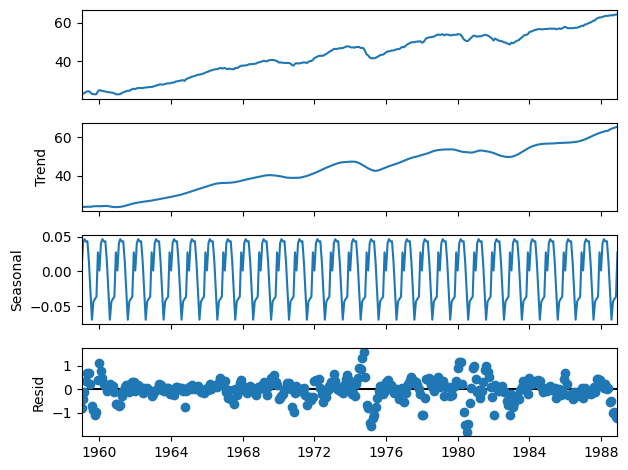

In [5]:
decompose = seasonal_decompose(a,model='additive', extrapolate_trend='freq')
decompose.plot()
plt.show()

In [6]:
print("1-trend; 2-seasonal; 3-resid:")
test = adfuller(decompose.trend)
if test[0]>test[4]["5%"]:
  print("есть единичные корни, ряд не стационарен")
else:
  print("нет единичных корней, ряд стационарен")

test = adfuller(decompose.seasonal)
if test[0]>test[4]["5%"]:
  print("есть единичные корни, ряд не стационарен")
else:
  print("нет единичных корней, ряд стационарен")

test = adfuller(decompose.resid)
if test[0]>test[4]["5%"]:
  print("есть единичные корни, ряд не стационарен")
else:
  print("нет единичных корней, ряд стационарен")

1-trend; 2-seasonal; 3-resid:
есть единичные корни, ряд не стационарен
нет единичных корней, ряд стационарен
нет единичных корней, ряд стационарен


***ПРОВЕРКА НА ИНТЕГРИРУЕМОСТЬ ПОРЯДКА К:***




In [7]:
k=1
while 1:
  b=a.diff(periods=k)
  test = adfuller(b[k:])
  if test[0]>test[4]["5%"]:
    break
  k+=1
print("К =",k-1)


К = 16


Для моделирования будем использовать модель ARIMA, построенную для ряда первых разностей.
Итак, чтобы построить модель нам нужно знать ее порядок, состоящий из 2-х параметров:
p — порядок компоненты AR
d — порядок интегрированного ряда
q — порядок компонетны MA


Параметр d есть и он равет 16, осталось определить p и q. Для их определения нам надо изучить авторкорреляционную(ACF) и частично автокорреляционную(PACF) функции для ряда первых разностей.
ACF поможет нам определить q, т. к. по ее коррелограмме можно определить количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA
PACF поможет нам определить p, т. к. по ее коррелограмме можно определить максимальный номер коэффициента сильно отличный от 0 в модели AR.

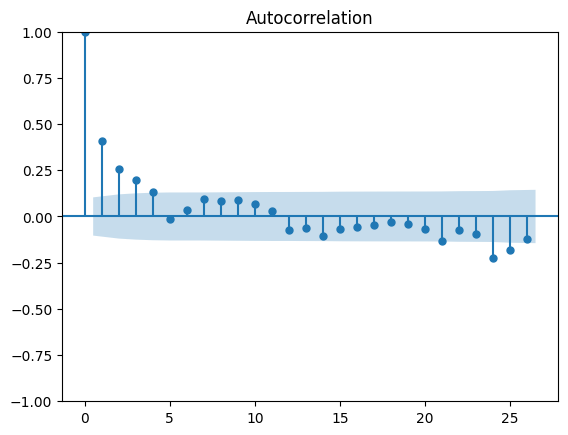

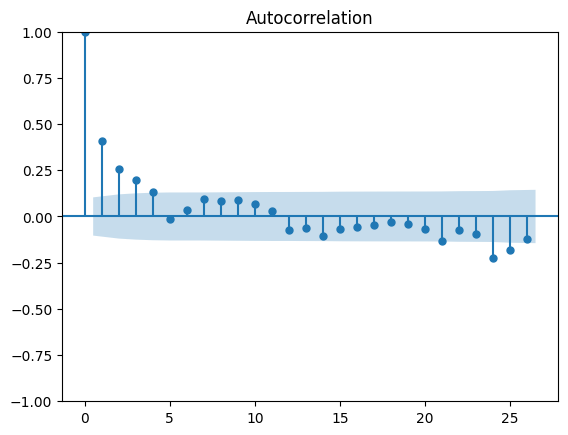

In [26]:
plot_acf(a.diff(periods=1)[1:])


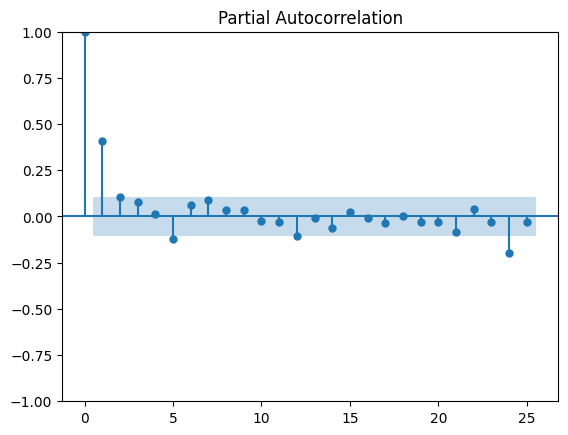

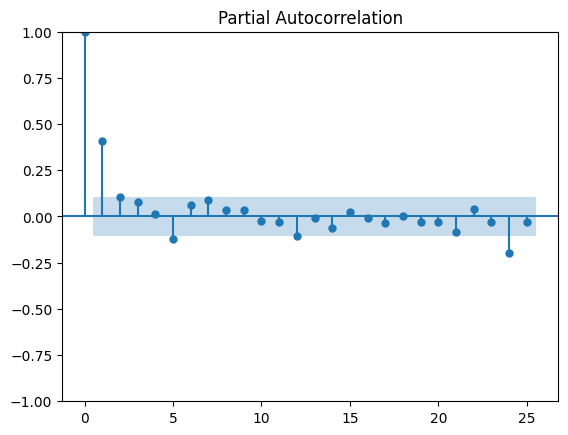

In [27]:
plot_pacf(a.diff(periods=1)[1:], lags=25)

После изучения коррелограммы ACF можно сделать вывод, что p = 2, т.к. на ней только 1 лаг сильно отличнен от нуля. По коррелограмме PACF можно увидеть, что q = 2

Итак, имеем:
p=2
d=16
q=2

In [35]:
model = ARIMA(a, order=(2,16,2)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  360
Model:                ARIMA(2, 16, 2)   Log Likelihood                   0.000
Date:                Thu, 30 Nov 2023   AIC                             10.000
Time:                        10:11:15   BIC                             29.203
Sample:                    01-01-1959   HQIC                            17.648
                         - 12-01-1988                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.673e-05         -0        inf      0.000   -3.67e-05   -3.67e-05
ar.L2          1.0000         -0       -inf      0.000       1.000       1.000
ma.L1         -1.9998         -0        inf      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3015: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1363: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
